# Scaling

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
df = pd.read_csv('cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [81]:
df= df[['km_driven', 'selling_price']]
df

,km_driven,selling_price
0,145500,450000
1,120000,370000
2,140000,158000
3,127000,225000
4,120000,130000
...,...,...
8123,110000,320000
8124,119000,135000
8125,120000,382000
8126,25000,290000


In [82]:
df.sample(5)

,km_driven,selling_price
4378,109000,685000
5337,80000,240000
6123,5000,675000
6422,50000,459999
413,20000,3800000


In [196]:
X = df[['km_driven','selling_price']]
y = df.iloc[:,-1]

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape


((5689, 2), (2439, 2))

In [198]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [199]:
scaler.mean_

array([ 69915.7709615 , 645591.70574793])

In [200]:
X_train

,km_driven,selling_price
2246,50000,350000
2095,120000,225000
3290,60000,370000
6868,5000,360000
6895,40000,1350000
...,...,...
7935,100000,40000
5192,152000,580000
3980,70000,190000
235,110000,250000


In [201]:
X_train_scaled

array([[-0.3808476 , -0.3587019 ],
       [ 0.95775648, -0.51038998],
       [-0.18961845, -0.33443181],
       ...,
       [ 0.0016107 , -0.55286264],
       [ 0.76652732, -0.48005236],
       [-0.07956607, -0.2009463 ]])

In [202]:
np.round(X_train_scaled, 1)

array([[-0.4, -0.4],
       [ 1. , -0.5],
       [-0.2, -0.3],
       ...,
       [ 0. , -0.6],
       [ 0.8, -0.5],
       [-0.1, -0.2]])

In [203]:
X_train_scaled.dtype

dtype('float64')

In [204]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

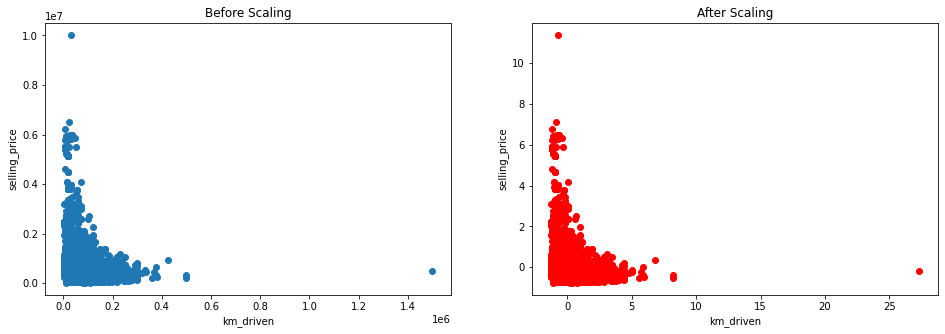

In [206]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['km_driven'], X_train['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['km_driven'],X_train_scaled['selling_price'], color='red')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('After Scaling')


plt.show()

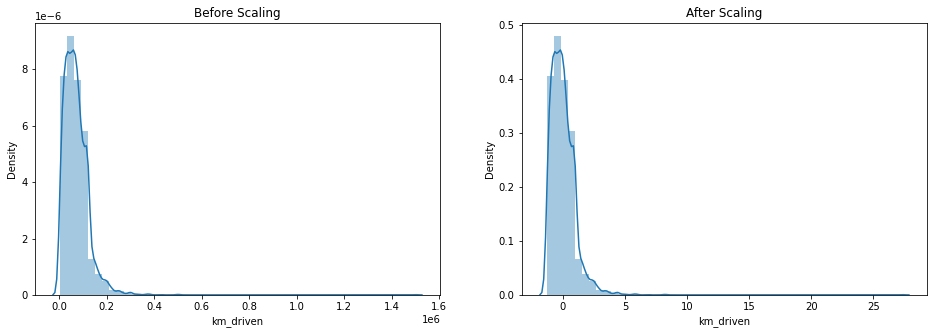

In [207]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['km_driven'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['km_driven'])
plt.title('After Scaling')

plt.show()

In [208]:
#without scaling
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy on Actual data = ",accuracy_score(y_test,y_pred))

Accuracy on Actual data =  0.04223042230422304


In [209]:
#with scaling
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
print("Accuracy on Scaled data = ",accuracy_score(y_test,y_pred_scaled))

Accuracy on Scaled data =  0.09553095530955309


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled1 = scaler.transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

In [212]:
X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=X_train.columns)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns=X_test.columns)

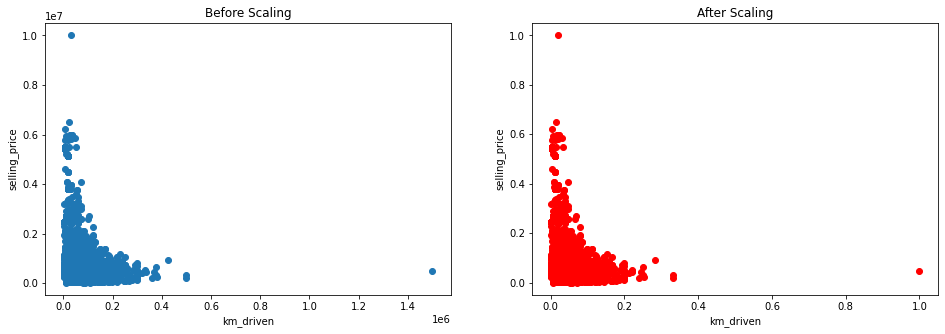

In [213]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['km_driven'], X_train['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled1['km_driven'], X_train_scaled1['selling_price'],color='red')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('After Scaling')


plt.show()

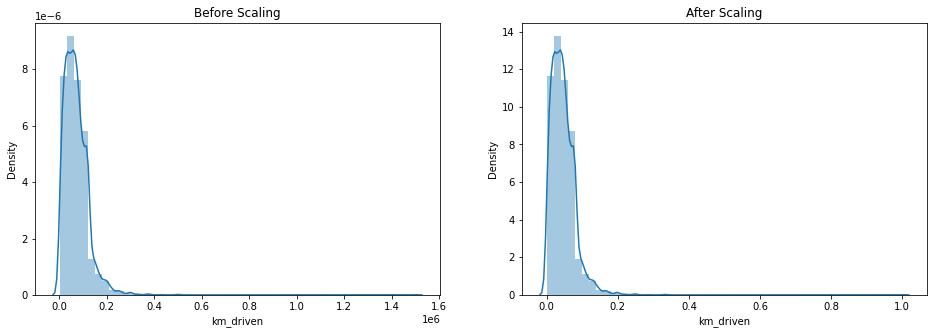

In [214]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['km_driven'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled1['km_driven'])
plt.title('After Scaling')

plt.show()

# Encoding

In [107]:
import numpy as np
import pandas as pd

In [109]:
df = pd.read_csv('cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [110]:
df[['brand', 'fuel', 'owner']]

,brand,fuel,owner
0,Maruti,Diesel,First Owner
1,Skoda,Diesel,Second Owner
2,Honda,Petrol,Third Owner
3,Hyundai,Diesel,First Owner
4,Maruti,Petrol,First Owner
...,...,...,...
8123,Hyundai,Petrol,First Owner
8124,Hyundai,Diesel,Fourth & Above Owner
8125,Maruti,Diesel,First Owner
8126,Tata,Diesel,First Owner


In [111]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [114]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [112]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [113]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [115]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],['Diesel', 'Petrol', 'LPG', 'CNG'],['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])
df[['brand', 'fuel', 'owner']]= oe.fit_transform(df[['brand', 'fuel', 'owner']])

In [116]:
oe.categories_

[array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
       dtype=object),
 array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object)]

In [117]:
df[['brand', 'fuel', 'owner']]

,brand,fuel,owner
0,0.0,0.0,0.0
1,1.0,0.0,1.0
2,2.0,1.0,2.0
3,3.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
8123,3.0,1.0,0.0
8124,3.0,0.0,3.0
8125,0.0,0.0,0.0
8126,8.0,0.0,0.0


In [118]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,0.0,450000
1,1.0,120000,0.0,1.0,370000
2,2.0,140000,1.0,2.0,158000
3,3.0,127000,0.0,0.0,225000
4,0.0,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,3.0,110000,1.0,0.0,320000
8124,3.0,119000,0.0,3.0,135000
8125,0.0,120000,0.0,0.0,382000
8126,8.0,25000,0.0,0.0,290000


In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['selling_price']= le.fit_transform(df['selling_price'])

In [120]:
le.classes_

array([   29999,    30000,    31000,    31504,    33351,    33983,
          35000,    39000,    40000,    42000,    45000,    45957,
          46000,    50000,    52000,    54000,    55000,    55599,
          56000,    57000,    58000,    59000,    59259,    60000,
          64000,    65000,    66000,    67000,    67500,    68000,
          70000,    72000,    75000,    75527,    78000,    80000,
          80500,    81000,    83000,    85000,    86000,    88000,
          89000,    90000,    90177,    92000,    93000,    93150,
          94500,    95000,    96000,    98000,    99000,   100000,
         101000,   102000,   105000,   108000,   110000,   111000,
         112999,   114999,   115999,   118000,   119000,   120000,
         121000,   122000,   124000,   125000,   126000,   127000,
         128000,   129000,   130000,   131000,   132000,   135000,
         136000,   138000,   140000,   141000,   142000,   144000,
         145000,   148000,   149000,   150000,   151000,   152

In [121]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,0.0,282
1,1.0,120000,0.0,1.0,229
2,2.0,140000,1.0,2.0,94
3,3.0,127000,0.0,0.0,136
4,0.0,120000,1.0,0.0,74
...,...,...,...,...,...
8123,3.0,110000,1.0,0.0,199
8124,3.0,119000,0.0,3.0,77
8125,0.0,120000,0.0,0.0,238
8126,8.0,25000,0.0,0.0,178


# Outlier handling

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [127]:
df = pd.read_csv('cars.csv')


In [128]:
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
1102,Maruti,58343,Petrol,First Owner,225000
4879,Hyundai,80000,Diesel,First Owner,670000
5520,Volkswagen,66000,Diesel,First Owner,540000
5316,Hyundai,120000,Diesel,Fourth & Above Owner,185000
6985,Tata,35000,Petrol,First Owner,370000


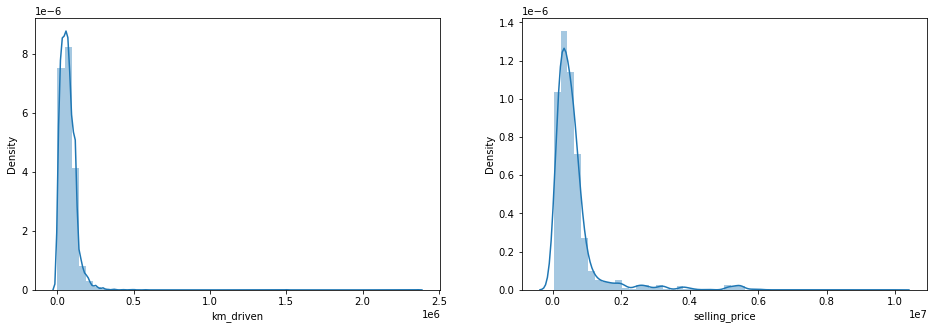

In [129]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['km_driven'])

plt.subplot(1,2,2)
sns.distplot(df['selling_price'])

plt.show()

In [131]:
#Outlier in Normal Distribution

df['selling_price'].skew()

4.193533440675855

In [132]:
print("Mean value of selling_price",df['selling_price'].mean())
print("Std value of selling_price",df['selling_price'].std())
print("Min value of selling_price",df['selling_price'].min())
print("Max value of selling_price",df['selling_price'].max())

Mean value of selling_price 638271.8077017716
Std value of selling_price 806253.4035082331
Min value of selling_price 29999
Max value of selling_price 10000000


In [133]:
#trimming

upper_limit= df['selling_price'].mean() + 3*df['selling_price'].std()
lower_limit= df['selling_price'].mean() - 3*df['selling_price'].std()

In [134]:
outlier = df[(df['selling_price'] > upper_limit) | (df['selling_price'] < lower_limit)]
outlier

,brand,km_driven,fuel,owner,selling_price
131,Audi,31800,Diesel,First Owner,3975000
132,Lexus,20000,Petrol,First Owner,5150000
133,Jaguar,45000,Diesel,First Owner,3200000
134,Jeep,17000,Petrol,First Owner,4100000
135,Land,21000,Diesel,First Owner,4500000
...,...,...,...,...,...
7860,Jaguar,45000,Diesel,First Owner,3200000
7862,Volvo,20000,Diesel,First Owner,3800000
7872,BMW,7500,Diesel,First Owner,5400000
7873,BMW,8500,Diesel,First Owner,5500000


In [135]:
new_df = df[(df['selling_price'] < upper_limit) & (df['selling_price'] > lower_limit)]
new_df.shape

(7899, 5)

In [136]:
df['selling_price_zscore'] = (df['selling_price'] - df['selling_price'].mean())/df['selling_price'].std()

In [137]:
outlier = df[(df['selling_price_zscore'] > 3) | (df['selling_price_zscore'] < -3)]
outlier

,brand,km_driven,fuel,owner,selling_price,selling_price_zscore
131,Audi,31800,Diesel,First Owner,3975000,4.138560
132,Lexus,20000,Petrol,First Owner,5150000,5.595918
133,Jaguar,45000,Diesel,First Owner,3200000,3.177324
134,Jeep,17000,Petrol,First Owner,4100000,4.293598
135,Land,21000,Diesel,First Owner,4500000,4.789720
...,...,...,...,...,...,...
7860,Jaguar,45000,Diesel,First Owner,3200000,3.177324
7862,Volvo,20000,Diesel,First Owner,3800000,3.921507
7872,BMW,7500,Diesel,First Owner,5400000,5.905995
7873,BMW,8500,Diesel,First Owner,5500000,6.030025


In [138]:
new_df1 = df[(df['selling_price_zscore'] < 3 ) & (df['selling_price_zscore'] > -3)]
new_df1.shape

(7899, 6)

<AxesSubplot:xlabel='selling_price'>

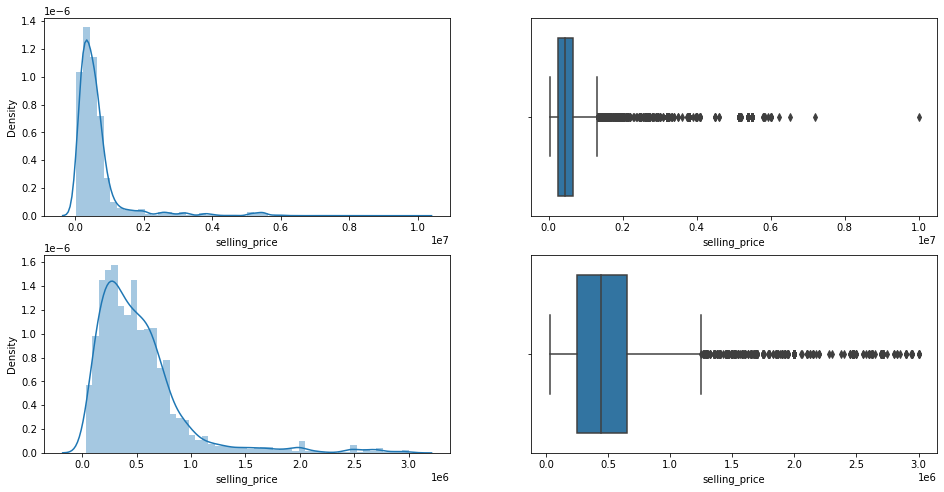

In [139]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])

plt.subplot(2,2,2)
sns.boxplot(df['selling_price'])

plt.subplot(2,2,3)
sns.distplot(new_df1['selling_price'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['selling_price'])

In [140]:
#capping

df2=df.copy()
df2['selling_price'] = np.where(
    df2['selling_price']>upper_limit,
    upper_limit,
    np.where(
        df2['selling_price']<lower_limit,
        lower_limit,
        df2['selling_price']
    )
)

<AxesSubplot:xlabel='selling_price'>

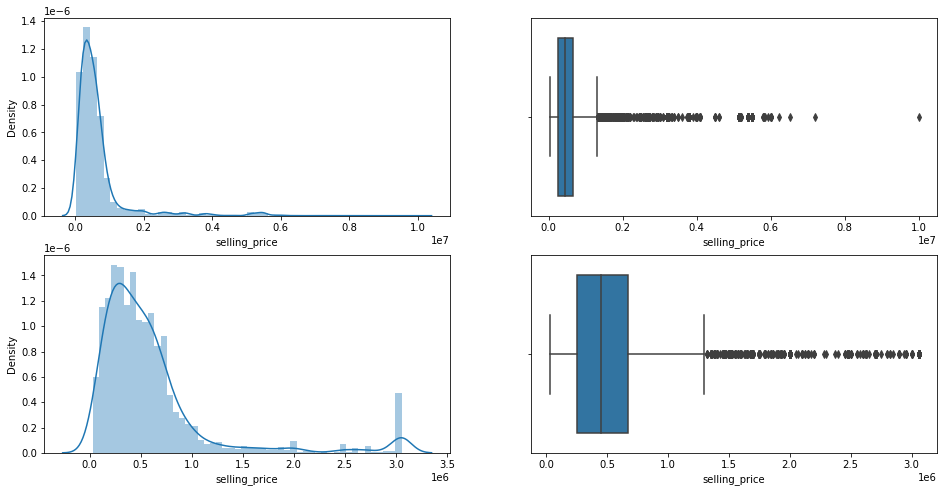

In [141]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])

plt.subplot(2,2,2)
sns.boxplot(df['selling_price'])

plt.subplot(2,2,3)
sns.distplot(df2['selling_price'])

plt.subplot(2,2,4)
sns.boxplot(df2['selling_price'])

# Null value handling


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
df = pd.read_csv('cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [147]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

# Log Transformation

In [148]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
df = pd.read_csv('cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [154]:
df= df[['km_driven', 'selling_price']]
df

,km_driven,selling_price
0,145500,450000
1,120000,370000
2,140000,158000
3,127000,225000
4,120000,130000
...,...,...
8123,110000,320000
8124,119000,135000
8125,120000,382000
8126,25000,290000


In [155]:
df['km_driven'].fillna(df['km_driven'].mean(), inplace=True)
df

,km_driven,selling_price
0,145500,450000
1,120000,370000
2,140000,158000
3,127000,225000
4,120000,130000
...,...,...
8123,110000,320000
8124,119000,135000
8125,120000,382000
8126,25000,290000


In [156]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

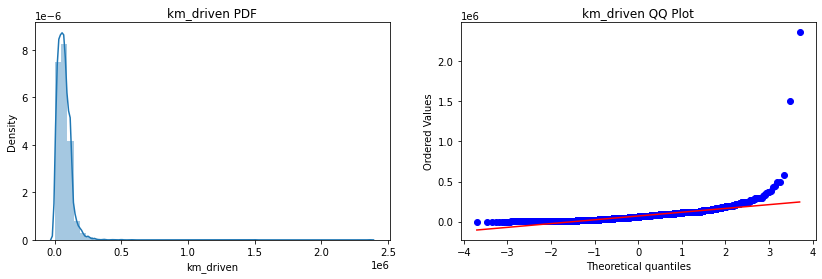

In [159]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['km_driven'])
plt.title('km_driven PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['km_driven'], dist="norm", plot=plt)
plt.title('km_driven QQ Plot')

plt.show()

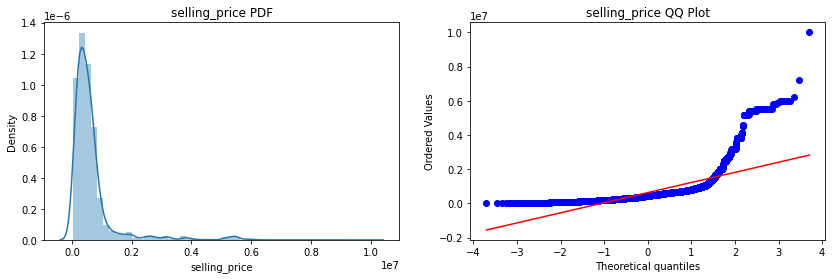

In [160]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['selling_price'])
plt.title('selling_price PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['selling_price'], dist="norm", plot=plt)
plt.title('selling_price QQ Plot')

plt.show()

In [164]:
#Function transformation (Log Transform)
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [165]:
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
y_pred= clf.predict(X_test_transformed)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.05043050430504305


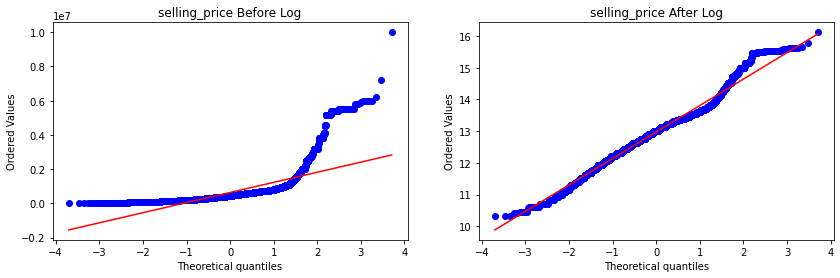

In [166]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['selling_price'], dist="norm", plot=plt)
plt.title('selling_price Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['selling_price'], dist="norm", plot=plt)
plt.title('selling_price After Log')

plt.show()

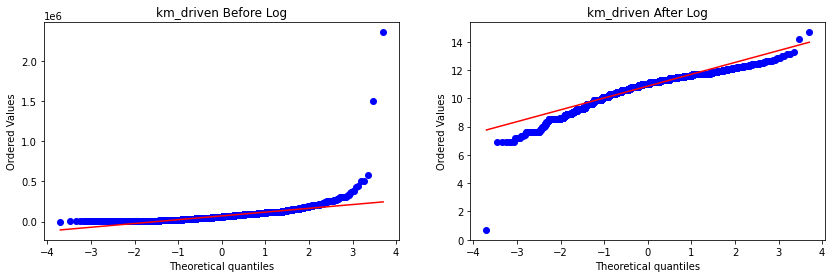

In [167]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['km_driven'], dist="norm", plot=plt)
plt.title('km_driven Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['km_driven'], dist="norm", plot=plt)
plt.title('km_driven After Log')

plt.show()

# Box-Cox transformation

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [170]:
df = pd.read_csv('cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [176]:
df = df[['km_driven','selling_price']]
df

,km_driven,selling_price
0,145500,450000
1,120000,370000
2,140000,158000
3,127000,225000
4,120000,130000
...,...,...
8123,110000,320000
8124,119000,135000
8125,120000,382000
8126,25000,290000


In [187]:
X = df[['km_driven','selling_price']]
y = df.iloc[:,-1]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

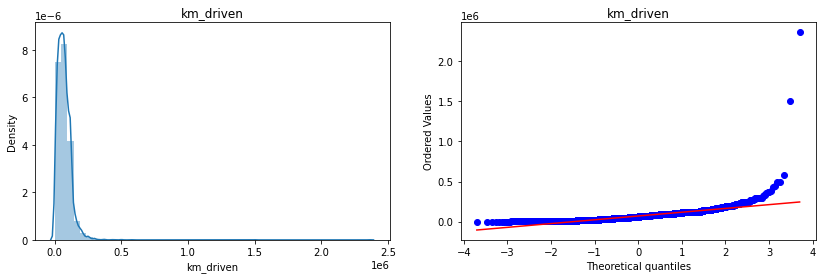

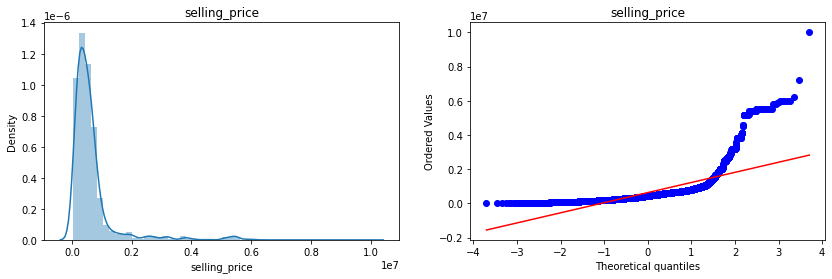

In [189]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [190]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

1.0

In [192]:
import numpy as np
import warnings
np.warnings = warnings

In [193]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train+ 0.00001 )
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,km_driven,0.361938
1,selling_price,-9.860708


In [194]:
# Applying linear regression on transformed data
lr1 = LinearRegression()
lr1.fit(X_train_transformed,y_train)
y_pred2 = lr1.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.11437499829852837

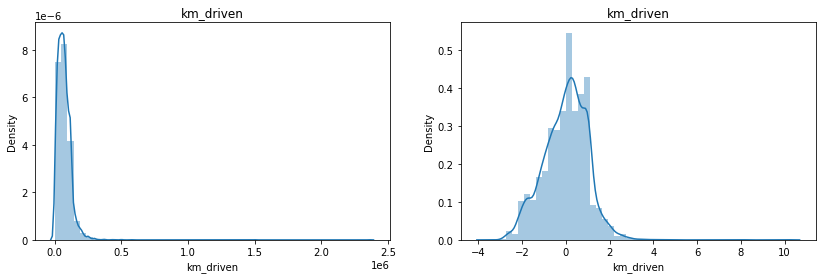

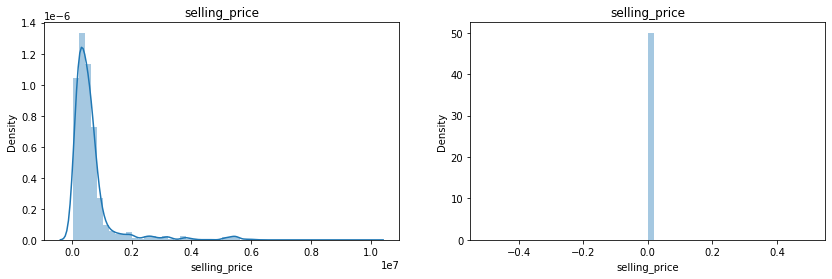

In [195]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()
